# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [25]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [26]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Image dimensions: (32, 32, 3)
Number of channels: 3

Number of classes: 100
Min label value: 0
Max label value: 99

Pixel value range:
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 121.936059453125


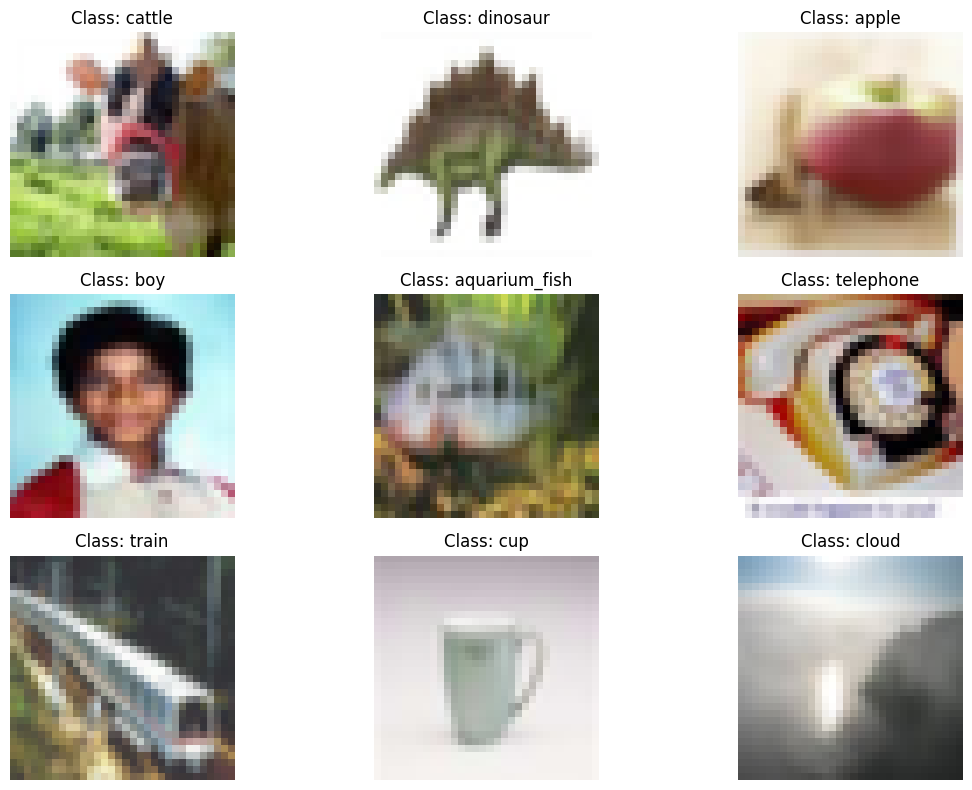

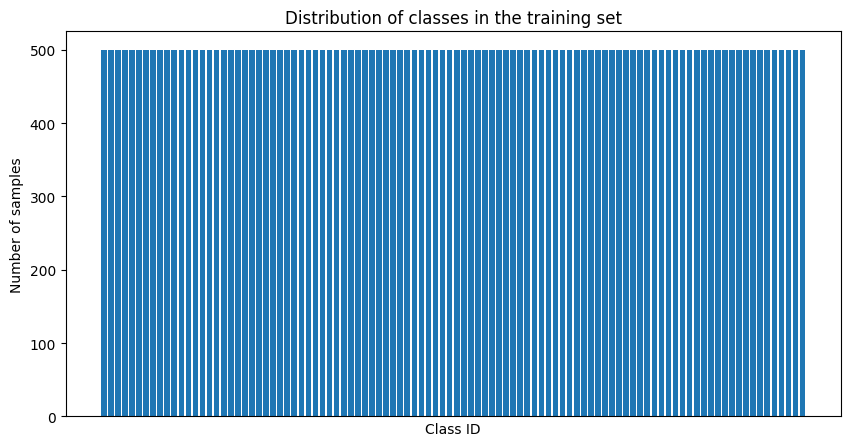


Number of samples per class in training set: 500
Total number of training samples: 50000
Total number of test samples: 10000


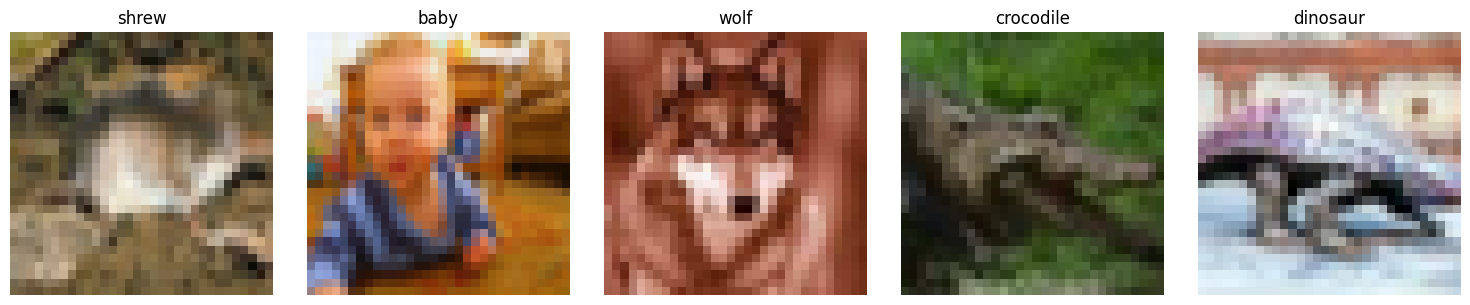

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Examine the shape of the training and test sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

# Examine the dimensions of the images
print("\nImage dimensions:", x_train[0].shape)
print("Number of channels:", x_train[0].shape[2])

# Examine the number of classes
print("\nNumber of classes:", len(class_names))
print("Min label value:", np.min(y_train))
print("Max label value:", np.max(y_train))

# Display some statistics about the pixel values
print("\nPixel value range:")
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))
print("Mean pixel value:", np.mean(x_train))

# Visualize some examples from the training set
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {class_names[y_train[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Show the distribution of classes in the training set
unique_classes, class_counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar(unique_classes, class_counts)
plt.xlabel('Class ID')
plt.ylabel('Number of samples')
plt.title('Distribution of classes in the training set')
plt.xticks([])  # Hide x-axis ticks as there are too many classes
plt.show()

# Print the number of samples per class
print("\nNumber of samples per class in training set:", class_counts[0])
print("Total number of training samples:", len(y_train))
print("Total number of test samples:", len(y_test))

# Show a random example from each of 5 random classes
random_classes = np.random.choice(100, 5, replace=False)
plt.figure(figsize=(15, 3))
for i, class_id in enumerate(random_classes):
    # Find indices of images from this class
    indices = np.where(y_train == class_id)[0]
    # Select a random image from this class
    random_idx = np.random.choice(indices)

    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[random_idx])
    plt.title(f"{class_names[class_id]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

After normalization:
Min pixel value: 0.0
Max pixel value: 0.003921569
Mean pixel value: 0.0018752154

Original label shape: (50000,)
One-hot encoded label shape: (50000, 100)
Example of one-hot encoded label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
This corresponds to class: cattle

After train-validation split:
Training set shape: (40000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation set shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


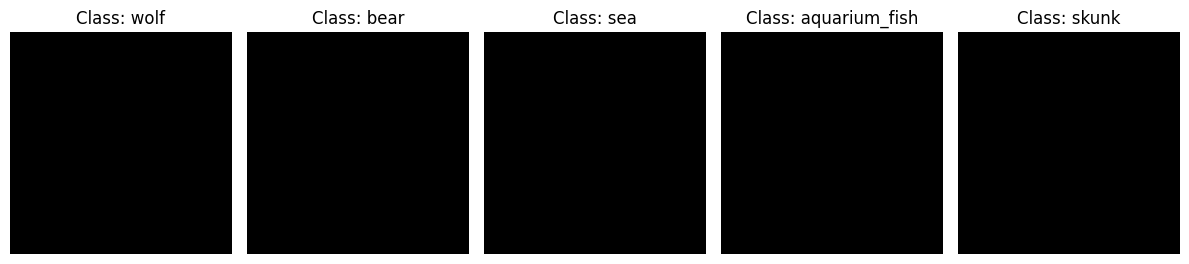

In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verify normalization
print("After normalization:")
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))
print("Mean pixel value:", np.mean(x_train))

# Step 2: Convert the labels to one-hot encoded vectors
# First, ensure labels are flattened (remove extra dimension)
y_train = y_train.flatten()
y_test = y_test.flatten()

# Then convert to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=100)
y_test_one_hot = to_categorical(y_test, num_classes=100)

# Verify one-hot encoding
print("\nOriginal label shape:", y_train.shape)
print("One-hot encoded label shape:", y_train_one_hot.shape)
print("Example of one-hot encoded label:", y_train_one_hot[0])
print("This corresponds to class:", class_names[y_train[0]])

# Step 3: Split the training set into training and validation sets (80% training, 20% validation)
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train, y_train_one_hot, test_size=0.2, random_state=42
)

# Verify the split
print("\nAfter train-validation split:")
print("Training set shape:", x_train_final.shape)
print("Training labels shape:", y_train_final.shape)
print("Validation set shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test_one_hot.shape)

# Visualize a few normalized images to ensure they look correct
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train_final[i])
    plt.title(f"Class: {class_names[np.argmax(y_train_final[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Create a CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')  # 100 classes for CIFAR-100
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print a summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,390,340 (5.30 MB)

 Trainable params: 1,388,868 (5.30 MB)

 Non-trainable params: 1,472 (5.75 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> Categorical Cross-Entropy
- <b>Optimizer:</b> Adam


Explanation:

Categorical Cross-Entropy is ideal for multi-class classification tasks like CIFAR-100 where labels are one-hot encoded, as it measures the divergence between the predicted probability distribution and the true distribution.

Adam is chosen for its adaptive learning rate feature, which typically leads to faster and more stable convergence compared to vanilla stochastic gradient descent.

In [18]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Print a summary of the compiled model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,390,340 (5.30 MB)

 Trainable params: 1,388,868 (5.30 MB)

 Non-trainable params: 1,472 (5.75 KB)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time

# Define callbacks for training
callbacks = [
    # Stop training when validation loss stops improving
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    # Save the best model during training
    ModelCheckpoint(
        'best_cifar100_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    # Reduce learning rate when validation loss plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# Set training parameters
batch_size = 32
epochs = 50  # Maximum number of epochs to train

# Record start time
start_time = time.time()

# Train the model
history = model.fit(
    x_train_final,
    y_train_final,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# Calculate training time
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=1)
print(f"Validation accuracy: {val_accuracy:.4f}")

Epoch 1/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6117 - loss: 1.3839
Epoch 1: val_accuracy improved from -inf to 0.53560, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6117 - loss: 1.3839 - val_accuracy: 0.5356 - val_loss: 1.6928 - learning_rate: 5.0000e-05
Epoch 2/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6166 - loss: 1.3629
Epoch 2: val_accuracy did not improve from 0.53560
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6166 - loss: 1.3629 - val_accuracy: 0.5306 - val_loss: 1.7488 - learning_rate: 5.0000e-05
Epoch 3/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6240 - loss: 1.3465
Epoch 3: val_accuracy improved from 0.53560 to 0.55660, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6240 - loss: 1.3465 - val_accuracy: 0.5566 - val_loss: 1.6327 - learning_rate: 5.0000e-05
Epoch 4/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6214 - loss: 1.3275
Epoch 4: val_accuracy did not improve from 0.55660
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6214 - loss: 1.3275 - val_accuracy: 0.5319 - val_loss: 1.7334 - learning_rate: 5.0000e-05
Epoch 5/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6272 - loss: 1.3138
Epoch 5: val_accuracy did not improve from 0.55660
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6272 - loss: 1.3138 - val_accuracy: 0.5045 - val_loss: 1.8299 - learning_rate: 5.0000e-05
Epoch 6/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6310 - loss: 1.3056
Epoch 6: val_accuracy did not improve from 0.55660
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6310 - loss: 1.3056 - val_accuracy: 0.5127 - val_loss: 1.8108 - learning_rate: 5.0

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6285 - loss: 1.3032 - val_accuracy: 0.5762 - val_loss: 1.5551 - learning_rate: 5.0000e-05
Epoch 8/50
1248/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6369 - loss: 1.2807
Epoch 8: val_accuracy did not improve from 0.57620
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6369 - loss: 1.2807 - val_accuracy: 0.4844 - val_loss: 1.9722 - learning_rate: 5.0000e-05
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6336 - loss: 1.2734
Epoch 9: val_accuracy did not improve from 0.57620
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6336 - loss: 1.2734 - val_accuracy: 0.5589 - val_loss: 1.6282 - learning_rate: 5.0000e-05
Epoch 10/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6387 - loss: 1.2578
Epoch 10: val_accuracy did not improve from 0.57620
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6387 - loss: 1.2578 - val_accuracy: 0.5293 - val_loss: 1.7547 - learning_rate: 5.

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6464 - loss: 1.2321 - val_accuracy: 0.5877 - val_loss: 1.4964 - learning_rate: 2.5000e-05
Epoch 14/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6503 - loss: 1.2332
Epoch 14: val_accuracy improved from 0.58770 to 0.58930, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6503 - loss: 1.2332 - val_accuracy: 0.5893 - val_loss: 1.4880 - learning_rate: 2.5000e-05
Epoch 15/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6454 - loss: 1.2368
Epoch 15: val_accuracy improved from 0.58930 to 0.59630, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6454 - loss: 1.2368 - val_accuracy: 0.5963 - val_loss: 1.4601 - learning_rate: 2.5000e-05
Epoch 16/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6492 - loss: 1.2139
Epoch 16: val_accuracy did not improve from 0.59630
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6492 - loss: 1.2139 - val_accuracy: 0.5941 - val_loss: 1.4809 - learning_rate: 2.5000e-05
Epoch 17/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6503 - loss: 1.2135
Epoch 17: val_accuracy did not improve from 0.59630
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6503 - loss: 1.2135 - val_accuracy: 0.5907 - val_loss: 1.4960 - learning_rate: 2.5000e-05
Epoch 18/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6495 - loss: 1.2139
Epoch 18: val_accuracy did not improve from 0.59630
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6495 - loss: 1.2139 - val_accuracy: 0.5854 - val_loss: 1.4941 - learning_rate

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6498 - loss: 1.2012 - val_accuracy: 0.5971 - val_loss: 1.4548 - learning_rate: 1.2500e-05
Epoch 22/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6541 - loss: 1.2004
Epoch 22: val_accuracy improved from 0.59710 to 0.60050, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6541 - loss: 1.2005 - val_accuracy: 0.6005 - val_loss: 1.4532 - learning_rate: 1.2500e-05
Epoch 23/50
1243/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6568 - loss: 1.1899
Epoch 23: val_accuracy did not improve from 0.60050
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6567 - loss: 1.1899 - val_accuracy: 0.5970 - val_loss: 1.4602 - learning_rate: 1.2500e-05
Epoch 24/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6530 - loss: 1.1945
Epoch 24: val_accuracy did not improve from 0.60050
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6530 - loss: 1.1945 - val_accuracy: 0.5986 - val_loss: 1.4604 - learning_rate: 1.2500e-05
Epoch 25/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6587 - loss: 1.1870
Epoch 25: val_accuracy did not improve from 0.60050
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6587 - loss: 1.1870 - val_accuracy: 0.5994 - val_loss: 1.4534 - learning_rate

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6599 - loss: 1.1765 - val_accuracy: 0.6016 - val_loss: 1.4518 - learning_rate: 6.2500e-06
Epoch 30/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6631 - loss: 1.1821
Epoch 30: val_accuracy did not improve from 0.60160
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6631 - loss: 1.1821 - val_accuracy: 0.6008 - val_loss: 1.4529 - learning_rate: 6.2500e-06
Epoch 31/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6540 - loss: 1.2003
Epoch 31: val_accuracy did not improve from 0.60160
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6540 - loss: 1.2003 - val_accuracy: 0.5988 - val_loss: 1.4546 - learning_rate: 6.2500e-06
Epoch 32/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6601 - loss: 1.1783
Epoch 32: val_accuracy improved from 0.60160 to 0.60360, saving model to best_cifar100_model.h5


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6601 - loss: 1.1783 - val_accuracy: 0.6036 - val_loss: 1.4509 - learning_rate: 6.2500e-06
Epoch 33/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6530 - loss: 1.1822
Epoch 33: val_accuracy did not improve from 0.60360
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6530 - loss: 1.1822 - val_accuracy: 0.6002 - val_loss: 1.4494 - learning_rate: 6.2500e-06
Epoch 34/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6537 - loss: 1.1983
Epoch 34: val_accuracy did not improve from 0.60360
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6537 - loss: 1.1982 - val_accuracy: 0.6017 - val_loss: 1.4598 - learning_rate: 6.2500e-06
Epoch 35/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6652 - loss: 1.1677
Epoch 35: val_accuracy did not improve from 0.60360
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6652 - loss: 1.1678 - val_accuracy: 0.5980 - val_loss: 1.4640 - learning_rate

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6621 - loss: 1.1734 - val_accuracy: 0.6042 - val_loss: 1.4499 - learning_rate: 6.2500e-06
Epoch 43/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6576 - loss: 1.1693
Epoch 43: val_accuracy did not improve from 0.60420

Epoch 43: ReduceLROnPlateau reducing learning rate to 3.1250001484295353e-06.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6576 - loss: 1.1693 - val_accuracy: 0.6012 - val_loss: 1.4526 - learning_rate: 6.2500e-06
Epoch 44/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6610 - loss: 1.1749
Epoch 44: val_accuracy did not improve from 0.60420
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6610 - loss: 1.1749 - val_accuracy: 0.6024 - val_loss: 1.4525 - learning_rate: 3.1250e-06
Epoch 45/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6603 - loss: 1.1751
Epoch 45: val_accuracy did not improve from 0.60420
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [24]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import numpy as np

# Load the best model weights
model.load_weights('best_cifar100_model.h5')

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test_one_hot, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)

# Calculate F1 score (weighted average)
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Weighted F1 Score: {f1:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0162 - loss: 150399.2031
Test accuracy: 0.0178
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Weighted F1 Score: 0.0049

Classification Report:
               precision    recall  f1-score   support

        apple      0.000     0.000     0.000       100
aquarium_fish      0.000     0.000     0.000       100
         baby      0.000     0.000     0.000       100
         bear      0.000     0.000     0.000       100
       beaver      0.000     0.000     0.000       100
          bed      0.000     0.000     0.000       100
          bee      0.000     0.000     0.000       100
       beetle      0.000     0.000     0.000       100
      bicycle      0.000     0.000     0.000       100
       bottle      0.000     0.000     0.000       100
         bowl      0.000     0.000     0.000       100
          boy      0.000     0.000     0.000       100
       bridge      0.000     0.000     0.000       100
          bus      0.000     0.000  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [ ]:
# Your Code Here

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
# Your Code Here

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
# Your Code Here

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.